<a href="https://colab.research.google.com/github/Joebasshd/crypto-price-movement-prediction-bitgrit/blob/main/crypto_price_movement_prediction_bitgrit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://assets.zyrosite.com/cdn-cgi/image/format=auto,w=572,fit=crop,q=95/YrD1rGnW49Hx2zOA/psp-analytics-logo-YZ9arzQ8bRt6OoQz.png" alt="Izziesnow logo" width="180"/>

### **Crypto Price Movement Prediction**


|  |  |
|:---|:---|
|**Skills** | Python, RandomForest, XGBoost, Logistic Regression, Clustering, Model Stacking  |
|**Sections** | Introduction, EDA, Preprocessing , Model Building and Evaluation  |


---

# Introduction to Crypto Price Movement Prediction Project

This project is for the Crypto Currency Price Prediction Challenge hosted by bitgrit, a company known for data science competitions and emerging Web3 technology. They recently announced their own token, BGR, aimed at enhancing user experiences on their platform. To celebrate this launch, they held a challenge focused on predicting cryptocurrency prices. The challenge asks: **"Will the price of a specific cryptocurrency (not named) rise or fall in two weeks?"**

Essentially, the goal of the challenge is to predict whether the value of the crypto asset rises or falls in a two week window.

The competition was hosted on bitgrit official website [here](https://bitgrit.net/competition/20)

# Evaluation Metric

The submissions for the competition were evaluated by F1 Score


___

In [ ]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive, files
from zipfile import ZipFile
import os
import random

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, f1_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import RandomOverSampler
from sklearn.utils import resample
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import xgboost as xgb
import logging

from tqdm import tqdm
import time

import warnings
warnings.filterwarnings('ignore')

###Data Importation

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Path to the zip file in my drive
zip_path = '/content/drive/My Drive/crypto_competition.zip'
extract_folder = '/content/drive/My Drive/crypto_competition'

# Extracting the zip file
with ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

# Listing the files extracted
os.listdir(extract_folder)

['train.csv', 'test.csv', 'solution_format.csv']

In [ ]:
# Load the datasets
train = pd.read_csv('/content/drive/My Drive/crypto_competition/train.csv')
test= pd.read_csv('/content/drive/My Drive/crypto_competition/test.csv')
solution_format = pd.read_csv('/content/drive/My Drive/crypto_competition/solution_format.csv')

In [ ]:
# Display the first few rows
train.head()

,ID,TR_1_EventInd,TR_2_EventInd,TR_3_EventInd,feature_10_A,feature_10_B,feature_10_F,feature_10_G,feature_1_A,feature_1_B,...,feature_9_F,feature_9_G,feature_X_A,feature_X_B,feature_X_C,feature_X_D,index_1,index_2,index_3,Target
0,1,NaN,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,...,NaN,NaN,1,0.049,1.542456,-0.274727,0.0,0.0,1.0,0
1,2,NaN,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,...,NaN,NaN,1,0.015,1.287473,-1.140626,NaN,NaN,NaN,0
2,3,NaN,NaN,NaN,0.0,0.023,0.0,0.0,1.0,0.004,...,0.0,1.0,1,0.006,0.251501,-1.221567,NaN,NaN,NaN,0
3,4,NaN,NaN,NaN,1.0,0.019,0.0,2.0,0.0,0.005,...,0.0,0.0,1,0.039,1.673783,0.527796,NaN,NaN,NaN,1
4,5,NaN,NaN,1.0,1.0,0.023,0.0,2.0,1.0,0.014,...,1.0,2.0,0,0.037,0.263406,-0.301984,NaN,NaN,NaN,0


In [ ]:
test.head()

,ID,TR_1_EventInd,TR_2_EventInd,TR_3_EventInd,feature_10_A,feature_10_B,feature_10_F,feature_10_G,feature_1_A,feature_1_B,...,feature_9_E,feature_9_F,feature_9_G,feature_X_A,feature_X_B,feature_X_C,feature_X_D,index_1,index_2,index_3
0,2661,NaN,NaN,NaN,1.0,0.023,0.0,1.0,0.0,0.006,...,2.147929,0.0,0.0,1,0.007,-0.756314,-1.017673,NaN,NaN,NaN
1,2662,NaN,NaN,NaN,0.0,0.015,0.0,0.0,1.0,0.004,...,5.832571,0.0,0.0,1,0.043,1.360077,1.350602,NaN,NaN,NaN
2,2663,NaN,NaN,NaN,0.0,0.021,0.0,1.0,1.0,0.006,...,5.491000,0.0,2.0,0,0.079,-1.537280,0.025794,NaN,NaN,NaN
3,2664,NaN,NaN,NaN,0.0,0.031,0.0,0.0,1.0,0.016,...,2.885000,0.0,0.0,1,0.013,2.282302,1.260612,NaN,NaN,NaN
4,2665,NaN,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,1,0.090,1.918765,2.524217,NaN,NaN,NaN


In [ ]:
solution_format.head()

,ID,Target
0,2661,1
1,2662,1
2,2663,1
3,2664,1
4,2665,1


## Exploratory Data Analysis

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2660 entries, 0 to 2659
Data columns (total 78 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             2660 non-null   int64  
 1   TR_1_EventInd  73 non-null     float64
 2   TR_2_EventInd  61 non-null     float64
 3   TR_3_EventInd  97 non-null     float64
 4   feature_10_A   2212 non-null   float64
 5   feature_10_B   1843 non-null   float64
 6   feature_10_F   2212 non-null   float64
 7   feature_10_G   2212 non-null   float64
 8   feature_1_A    1844 non-null   float64
 9   feature_1_B    1844 non-null   float64
 10  feature_1_C    1840 non-null   float64
 11  feature_1_D    1840 non-null   float64
 12  feature_1_E    1742 non-null   float64
 13  feature_1_F    1844 non-null   float64
 14  feature_1_G    1844 non-null   float64
 15  feature_2_A    1844 non-null   float64
 16  feature_2_B    1844 non-null   float64
 17  feature_2_C    1840 non-null   float64
 18  feature_

All the features in the dataset are numeric



##### Missing Values

In [ ]:
train.isnull().sum().to_dict()

{'ID': 0,
 'TR_1_EventInd': 2587,
 'TR_2_EventInd': 2599,
 'TR_3_EventInd': 2563,
 'feature_10_A': 448,
 'feature_10_B': 817,
 'feature_10_F': 448,
 'feature_10_G': 448,
 'feature_1_A': 816,
 'feature_1_B': 816,
 'feature_1_C': 820,
 'feature_1_D': 820,
 'feature_1_E': 918,
 'feature_1_F': 816,
 'feature_1_G': 816,
 'feature_2_A': 816,
 'feature_2_B': 816,
 'feature_2_C': 820,
 'feature_2_D': 820,
 'feature_2_E': 918,
 'feature_2_F': 816,
 'feature_2_G': 816,
 'feature_3_A': 816,
 'feature_3_B': 816,
 'feature_3_C': 820,
 'feature_3_D': 820,
 'feature_3_E': 918,
 'feature_3_F': 816,
 'feature_3_G': 816,
 'feature_4_A': 745,
 'feature_4_B': 748,
 'feature_4_C': 776,
 'feature_4_E': 1147,
 'feature_4_F': 745,
 'feature_4_G': 745,
 'feature_5_A': 817,
 'feature_5_B': 817,
 'feature_5_C': 821,
 'feature_5_D': 821,
 'feature_5_E': 919,
 'feature_5_F': 817,
 'feature_5_G': 817,
 'feature_6_A': 816,
 'feature_6_B': 816,
 'feature_6_C': 820,
 'feature_6_D': 820,
 'feature_6_E': 918,
 'feature_

A lot of missing values that would be handled later

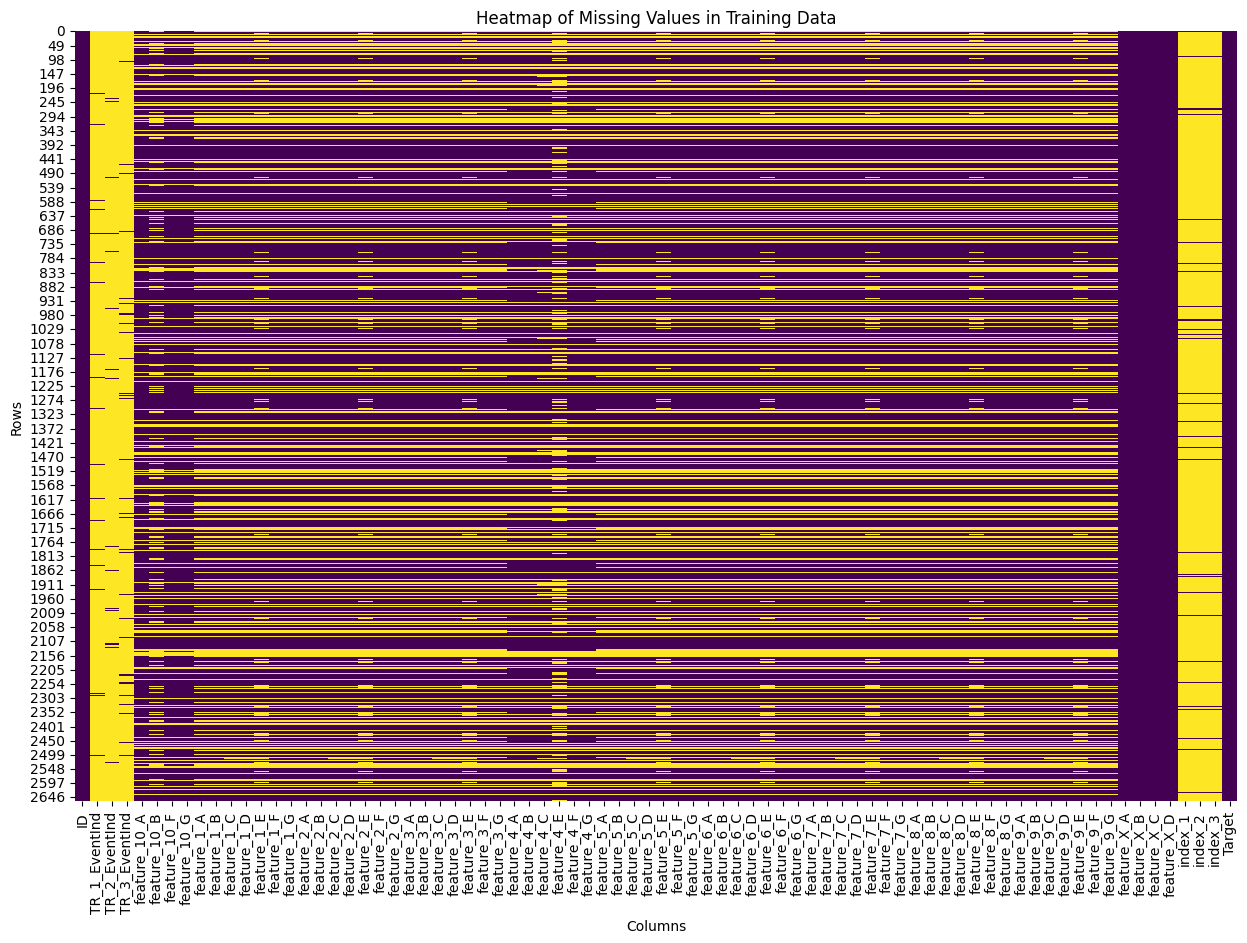

In [ ]:
# Create a heatmap to visualize missing values in the dataset
plt.figure(figsize=(15, 10))
sns.heatmap(train.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values in Training Data')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()


In [ ]:
# Calculate the percentage of missing values for each column
missing_percent = train.isnull().mean() * 100

# Identify columns with more than 80% missing values
columns_with_high_missing = missing_percent[missing_percent > 80].index.tolist()
missing_percent[missing_percent > 80]

TR_1_EventInd    97.255639
TR_2_EventInd    97.706767
TR_3_EventInd    96.353383
index_1          96.428571
index_2          96.428571
index_3          96.428571
dtype: float64

The following columns in the dataset have more than 80% missing values:

TR_1_EventInd: 97.26% missing

TR_2_EventInd: 97.71% missing

TR_3_EventInd: 96.35% missing

index_1: 96.43% missing

index_2: 96.43% missing

index_3: 96.43% missing

These columns need to be dropped or treated very carefully if I decide to keep them, as imputing such a high percentage of missing data could introduce significant bias into the model.

In [ ]:
train.duplicated().sum()

0

##### Balance of the Target Variable

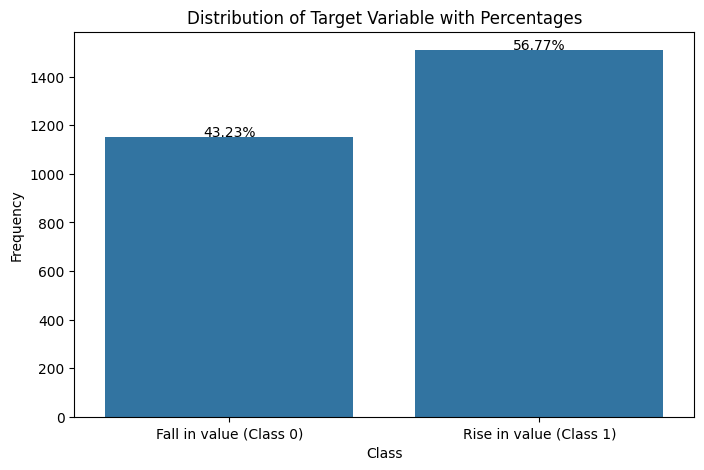

In [ ]:
# Create a bar plot for the target variable with percentage annotations
plt.figure(figsize=(8, 5))
ax = sns.countplot(x=train['Target'])
ax.set_title('Distribution of Target Variable with Percentages')
ax.set_xlabel('Class')
ax.set_ylabel('Frequency')

# Calculate the total number for percentage calculations
total = len(train['Target'])

# Add percentage annotations to each bar
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3, '{:1.2f}%'.format(100 * height / total), ha="center")

plt.xticks([0, 1], ['Fall in value (Class 0)', 'Rise in value (Class 1)'])
plt.show()


The positive class represents 56.77% of the dataset, which indicates that from the sample, the value of the crypto asset rises 56.77& of the time during a two week window, while it falls 43.23% of the time (the negative class).

Class imbalance is an issue when building classification models, and this would be addressed in the preprocessing section of the project.

###### Correlation Matrix

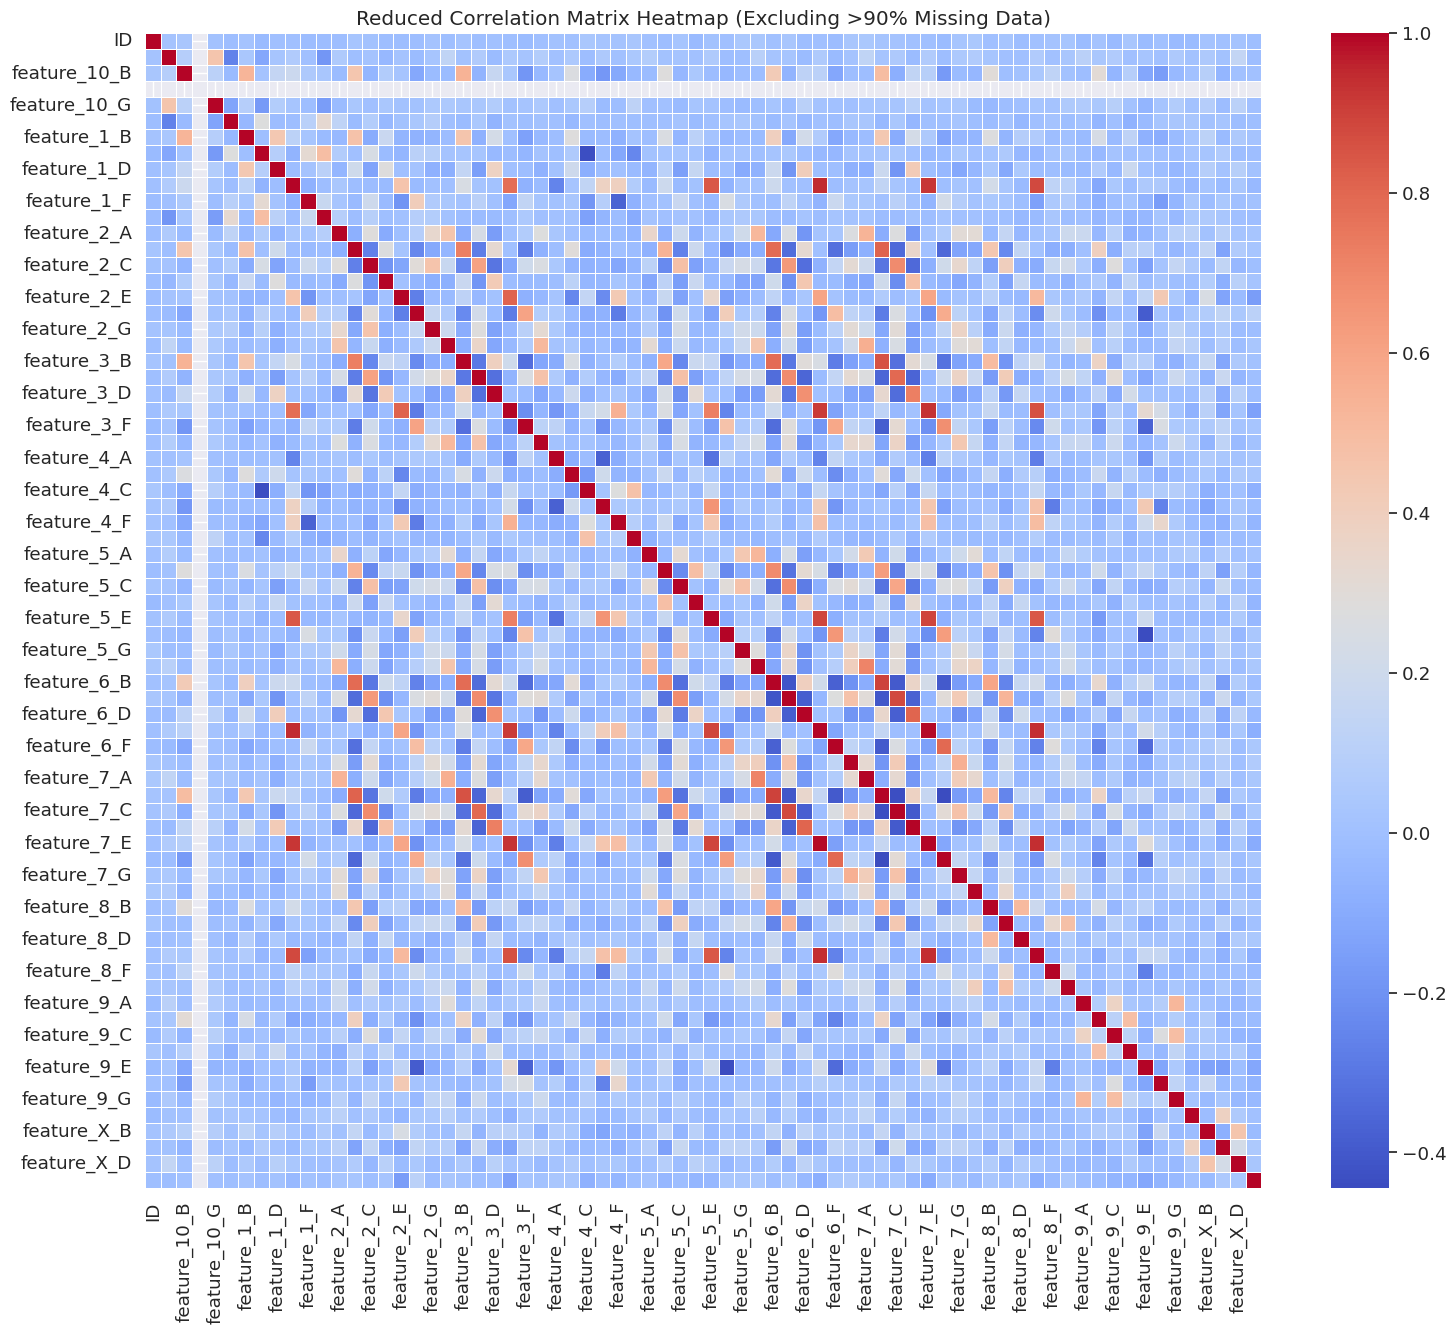

In [ ]:
# Identify columns with more than 90% missing values
columns_over_90_missing = train.columns[train.isnull().mean() > 0.85]

# Drop these columns from the training data for the correlation analysis
train_reduced1 = train.drop(columns=columns_over_90_missing)

# Recalculate the correlation matrix without the highly missing columns
reduced_correlation_matrix = train_reduced1.corr()

# Plotting the reduced correlation matrix as a heatmap
plt.figure(figsize=(18, 15))
sns.heatmap(reduced_correlation_matrix, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Reduced Correlation Matrix Heatmap (Excluding >90% Missing Data)')
plt.show()


##### Distributions of the Features

In [ ]:
exclude_cols = [
  'ID',
  'TR_1_EventInd',
  'TR_2_EventInd',
  'TR_3_EventInd',
  'index_1',
  'index_2',
  'index_3',
  'Target'
]

# List of all numeric columns excluding the specified columns
cols = [col for col in train.columns if col not in exclude_cols]

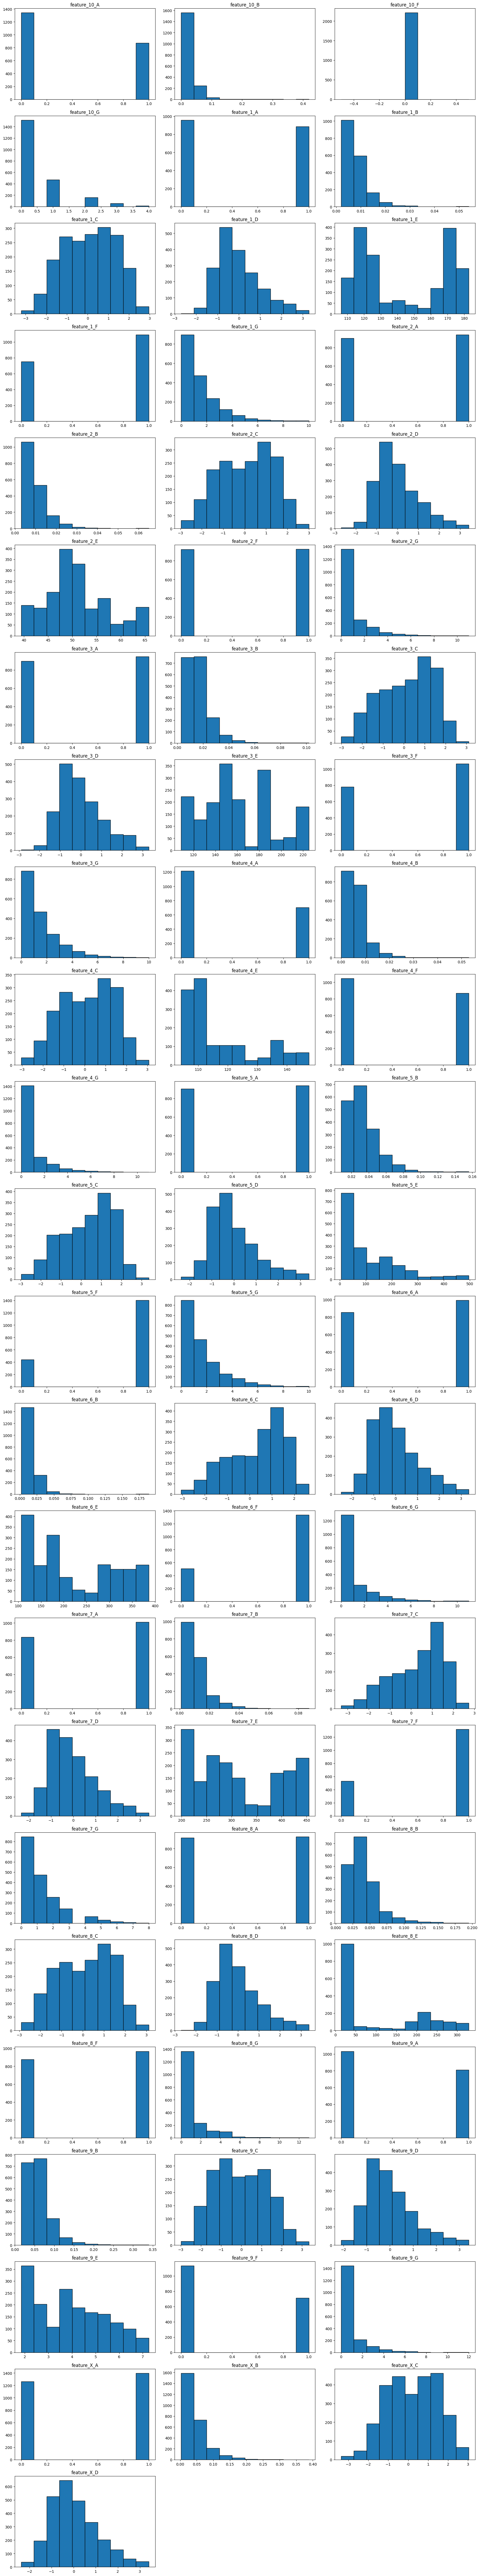

In [ ]:
# Setting up the figure size and the number of subplots
num_cols = len(cols)
num_rows = (num_cols + 2) // 3  # 3 columns per row

fig, axes = plt.subplots(num_rows, 3, figsize=(18, 4 * num_rows))
axes = axes.flatten()  # Flatten to easily iterate over axes

# Plot histograms
for i, col in enumerate(cols):
    axes[i].hist(train[col].dropna(), edgecolor='black')
    axes[i].set_title(col)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

# Remove empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

##### Feature Importance

In [ ]:
# Prepare data for Random Forest
X = train.drop('Target', axis=1)
y = train['Target']

# Impute missing values with the median
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Extract feature importances
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame to view the feature importances
features_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
features_df = features_df.sort_values(by='Importance', ascending=False)
features_df.head(40)  # Display the top 10 most important features


,Feature,Importance
72,feature_X_C,0.088998
73,feature_X_D,0.083484
0,ID,0.083463
71,feature_X_B,0.074097
19,feature_2_E,0.030408
67,feature_9_E,0.029243
26,feature_3_E,0.027414
32,feature_4_E,0.025310
46,feature_6_E,0.023125
31,feature_4_C,0.021830


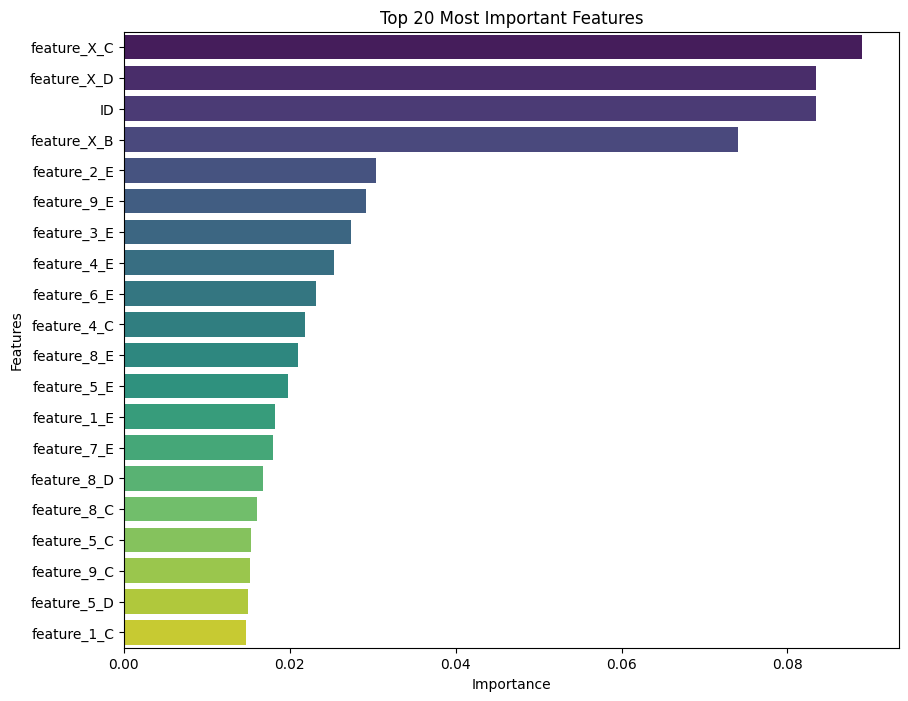

In [ ]:
# Select the top 20 most important features for visualization
top_20_features = features_df.head(20)

# Plotting the feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=top_20_features, palette='viridis')
plt.title('Top 20 Most Important Features')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()


Above is a bar graph showing the top 20 most important features as determined by the Random Forest model. This visualization helps in quickly identifying which features are most influential in predicting the target variable.

In [ ]:
train.describe()

,ID,TR_1_EventInd,TR_2_EventInd,TR_3_EventInd,feature_10_A,feature_10_B,feature_10_F,feature_10_G,feature_1_A,feature_1_B,...,feature_9_F,feature_9_G,feature_X_A,feature_X_B,feature_X_C,feature_X_D,index_1,index_2,index_3,Target
count,2660.000000,73.0,61.0,97.0,2212.000000,1843.000000,2212.0,2212.000000,1844.000000,1844.000000,...,1843.000000,1843.000000,2660.000000,2660.000000,2660.000000,2660.000000,95.000000,95.000000,95.000000,2660.000000
mean,1330.500000,1.0,1.0,1.0,0.394213,0.027890,0.0,0.457052,0.480477,0.008254,...,0.385784,0.880087,0.525564,0.044619,0.215647,0.040449,1.052632,8.000000,16.010526,0.567669
std,768.020182,0.0,0.0,0.0,0.488792,0.024328,0.0,0.788577,0.499754,0.004721,...,0.486912,1.320616,0.499440,0.037747,1.260185,1.054915,1.553092,17.953842,17.614365,0.495493
min,1.000000,1.0,1.0,1.0,0.000000,0.000000,0.0,0.000000,0.000000,0.002000,...,0.000000,0.000000,0.000000,0.003000,-3.360669,-2.381170,0.000000,0.000000,0.000000,0.000000
25%,665.750000,1.0,1.0,1.0,0.000000,0.015000,0.0,0.000000,0.000000,0.005000,...,0.000000,0.000000,0.000000,0.020000,-0.785635,-0.728389,0.000000,0.000000,3.500000,0.000000
50%,1330.500000,1.0,1.0,1.0,0.000000,0.022000,0.0,0.000000,0.000000,0.007000,...,0.000000,0.000000,1.000000,0.034000,0.253407,-0.134176,0.000000,0.000000,11.000000,1.000000
75%,1995.250000,1.0,1.0,1.0,1.000000,0.033000,0.0,1.000000,1.000000,0.010000,...,1.000000,1.000000,1.000000,0.056000,1.253811,0.674400,2.000000,6.500000,18.500000,1.000000
max,2660.000000,1.0,1.0,1.0,1.000000,0.419000,0.0,4.000000,1.000000,0.054000,...,1.000000,12.000000,1.000000,0.388000,3.038010,3.405693,7.000000,100.000000,100.000000,1.000000


The statistical summary is very interesting, especially if we take a closer look at the 6 columns we identified earlier that had missing values greater than 90% - TR_1_EventInd, TR_2_EventInd, TR_3_EventInd, index_1, index_2, and index_3.

Let's divide these columns into 3 groups - TR_x_EventInd and index_X

Before we continue, let's take a look at the data dictionary provided on the [competition page](https://bitgrit.net/competition/20)

________
ID: ID of each data point.

Target: 0 - the price dropped 2 weeks after the time of prediction 1 - the price increased 2 weeks after the time of prediction.

feature_x_y: independent variables from the market data.

TR_x_EventInd: Event that may or may not affect the crypto currencies price.

index_1 ~ index_3: the search trend on specific keywords pretaining to crypto currencies.
________

That's it! That's all the information that was provided about the description of these columns

- **TR_x_EventInd**: "Event that may or may not affect the crypto currencies price." <br>This could identify some sort of event that may or may not affect the price of the asset. For example the news of Covid-19 or Elon Musk making a tweet and everything goes haywire. Looking at the statistical summary of these 3 columns, they have only two possible values - **1** and **NaN**. My interpretation is that "1" represents the occurence of such an event during the two-week window and "NaN" represents the absence thereof.
If you're thinking what I'm thinking, yes, my go-to strategy is to replace the missing values with zero because they represent "no event"

- **index_X**: the search trend on specific keywords pretaining to crypto currencies.<br> The fact that the range of index_1 is **0 to 7** while that index_2 and index_3 is **0 to 100** makes me interpret the values in these columns as numbers on a scale to measure the trend of the particular asset in question or any crypto asset whatsoever. You guessed it, I'm filling the missing values in these columns with zeroes too, because that just means nothing was trending during that period.

Now, for the sake of creating a baseline model to work with, and because I'm still iterating to figure out the best imputation strategy for **feature_x_y**, I'll fill the nulls with zeroes too.

In [ ]:
#Fill NaN values with 0
train.fillna(0, inplace=True)
test.fillna(0, inplace=True)

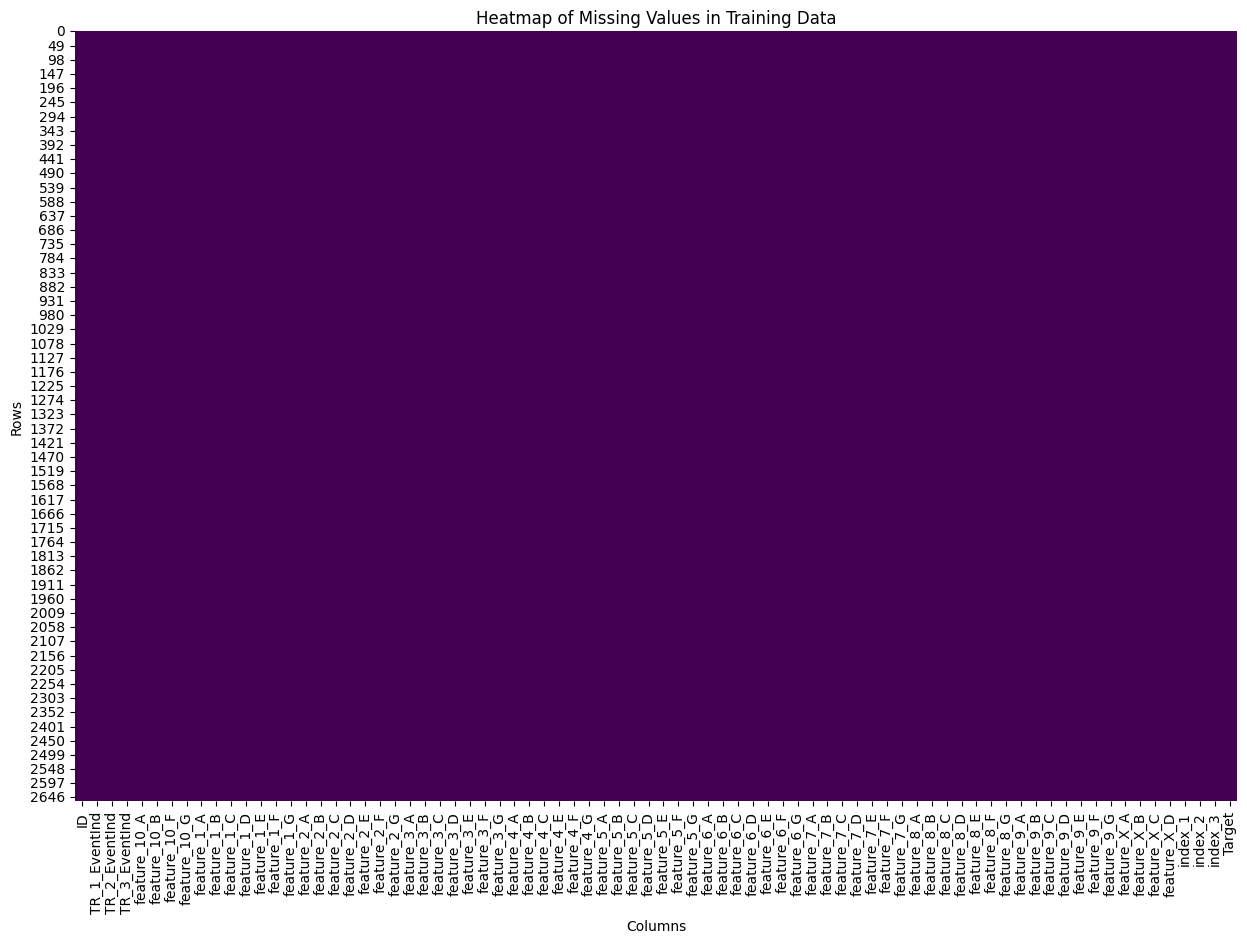

In [ ]:
# Check the missing values heat map again
plt.figure(figsize=(15, 10))
sns.heatmap(train.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values in Training Data')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()


In [ ]:
test.head()

,ID,TR_1_EventInd,TR_2_EventInd,TR_3_EventInd,feature_10_A,feature_10_B,feature_10_F,feature_10_G,feature_1_A,feature_1_B,...,feature_9_E,feature_9_F,feature_9_G,feature_X_A,feature_X_B,feature_X_C,feature_X_D,index_1,index_2,index_3
0,2661,0.0,0.0,0.0,1.0,0.023,0.0,1.0,0.0,0.006,...,2.147929,0.0,0.0,1,0.007,-0.756314,-1.017673,0.0,0.0,0.0
1,2662,0.0,0.0,0.0,0.0,0.015,0.0,0.0,1.0,0.004,...,5.832571,0.0,0.0,1,0.043,1.360077,1.350602,0.0,0.0,0.0
2,2663,0.0,0.0,0.0,0.0,0.021,0.0,1.0,1.0,0.006,...,5.491000,0.0,2.0,0,0.079,-1.537280,0.025794,0.0,0.0,0.0
3,2664,0.0,0.0,0.0,0.0,0.031,0.0,0.0,1.0,0.016,...,2.885000,0.0,0.0,1,0.013,2.282302,1.260612,0.0,0.0,0.0
4,2665,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.000,...,0.000000,0.0,0.0,1,0.090,1.918765,2.524217,0.0,0.0,0.0


## Data Preprocessing

##### Handling Class Imbalance

In [ ]:
train.Target.value_counts()

Target
1    1510
0    1150
Name: count, dtype: int64

In [ ]:
# Correctly identify the majority and minority classes based on their count
class_counts = train['Target'].value_counts()
majority_class = class_counts.idxmax()
minority_class = class_counts.idxmin()

# Filter the majority and minority classes into separate DataFrames
train_majority = train[train['Target'] == majority_class]
train_minority = train[train['Target'] == minority_class]

# Determine the number of instances in the majority class
majority_class_size = len(train_majority)

# Initialize the RandomOverSampler to increase the minority class size to match the majority class
ros = RandomOverSampler(sampling_strategy={minority_class: majority_class_size}, random_state=42)

# Prepare features (X) and labels (y)
X = train.drop('Target', axis=1)
y = train['Target']

# Fit and resample the dataset
X_resampled, y_resampled = ros.fit_resample(X, y)

# Create a new DataFrame from the resampled data
train_resampled = pd.DataFrame(X_resampled, columns=X.columns)
train_resampled['Target'] = y_resampled

# Since we are only upsampling the minority class to match the majority, there is no need to downsample
# The 'train_resampled' already contains a balanced dataset

# Shuffle the dataset to randomly mix the cases
balanced_train = train_resampled.sample(frac=1, random_state=42).reset_index(drop=True)

# Output some data to verify
print("Distribution of Target in the balanced dataset:")
print(balanced_train['Target'].value_counts())


Distribution of Target in the balanced dataset:
Target
0    1510
1    1510
Name: count, dtype: int64


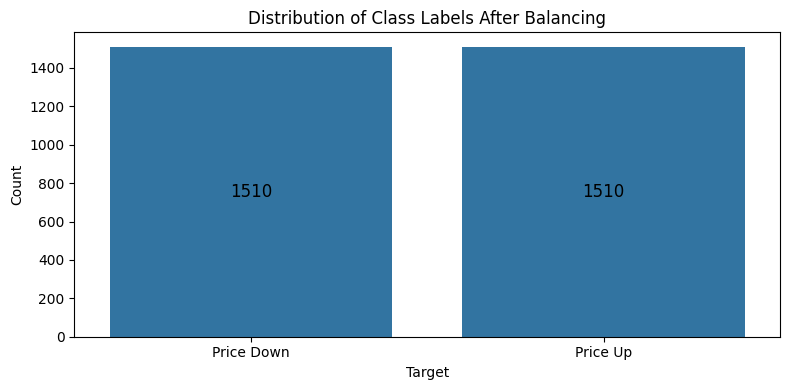

In [ ]:
# Create a count plot to visualize the distribution of the target class
plt.figure(figsize=(8, 4))
ax = sns.countplot(x='Target', data=balanced_train)
plt.title("Distribution of Class Labels After Balancing")
plt.xlabel('Target')
plt.ylabel('Count')
plt.xticks([0, 1], ['Price Down', 'Price Up'])

# Annotate each bar with the count of samples, positioned in the middle of each bar
for p in ax.patches:
    ax.annotate('1510', (p.get_x() + p.get_width() / 2., p.get_height() / 2),
                ha='center', va='center', fontsize=12, color='black')

plt.tight_layout()
plt.show()

## Model Building

In [ ]:
#Run train-test spilt

# Split the balanced data into features (X) and target (y)
X = balanced_train.drop('Target', axis=1)
y = balanced_train['Target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Random Forest Classifier

In [ ]:
# Building a Random forest classifier
print("Initializing and training the RandomForestClassifier model...")
# Initialize and train the RandomForestClassifier model
model_1 = RandomForestClassifier(random_state=42)

# Simulating a long process with tqdm
for i in tqdm(range(1), desc="Training Model"):
    model_1.fit(X_train, y_train)
    time.sleep(0.5)  # Simulating delay
print("Model training complete.")

print("Predicting on the test set...")
# Predict on the test set using tqdm for a simulated long process
for i in tqdm(range(1), desc="Making Predictions"):
    y_pred = model_1.predict(X_test)
    time.sleep(0.5)  # Simulating delay
print("Prediction complete.")


Initializing and training the RandomForestClassifier model...


Training Model: 100%|██████████| 1/1 [00:01<00:00,  1.54s/it]


Model training complete.
Predicting on the test set...


Making Predictions: 100%|██████████| 1/1 [00:00<00:00,  1.87it/s]

Prediction complete.


In [ ]:
from sklearn.metrics import classification_report, roc_auc_score, f1_score

# Evaluate the model
print(classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred))

# Calculate and print the F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)


              precision    recall  f1-score   support

           0       0.76      0.78      0.77       317
           1       0.75      0.73      0.74       287

    accuracy                           0.76       604
   macro avg       0.76      0.76      0.76       604
weighted avg       0.76      0.76      0.76       604

ROC AUC Score: 0.7554435638993614
F1 Score: 0.7564490806269485


The Random Forest Classifier gives a local f1 score of 0.7564

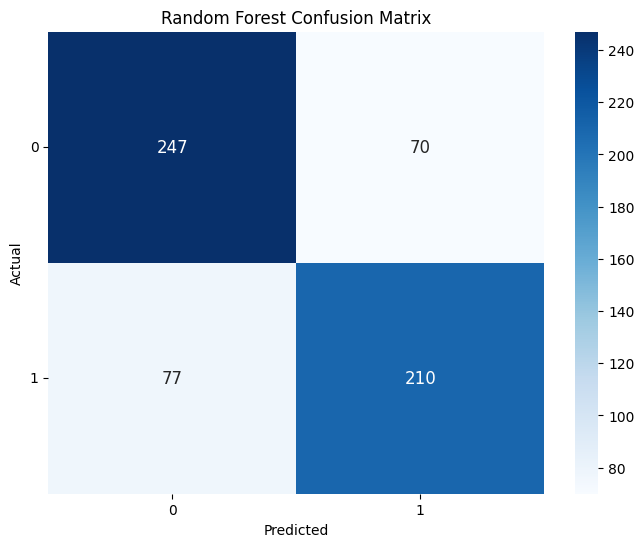

In [ ]:
#Visualizing the confusion matrix
# Define labels for the confusion matrix
labels = ['True Negative', 'False Positive', 'False Negative', 'True Positive']

conf_matrix = confusion_matrix(y_test, y_pred)

# Reshape the confusion matrix into a 2x2 array
conf_matrix_flat = conf_matrix.flatten()

# Create a dataframe from the reshaped confusion matrix
conf_df = pd.DataFrame(conf_matrix_flat.reshape(2, 2), index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])

# Plot the confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_df, annot=True, fmt='d', cmap='Blues', annot_kws={"fontsize": 12})
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(ticks=[0.5, 1.5], labels=['0', '1'])
plt.yticks(ticks=[0.5, 1.5], labels=['0', '1'], rotation=0)
plt.show()


### XGBoost

In [ ]:
# Create XGBoost classifier
xgb_model = xgb.XGBClassifier(objective='binary:logistic', random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Predict on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred_xgb))
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)


              precision    recall  f1-score   support

           0       0.75      0.79      0.77       317
           1       0.75      0.70      0.73       287

    accuracy                           0.75       604
   macro avg       0.75      0.75      0.75       604
weighted avg       0.75      0.75      0.75       604

F1 Score: 0.7564490806269485


We are getting good/similar f1 score as the Random Forest model, but could it be better? Grid Search would be employed to train the XGBoost model on the best hyperparamters

###Tuned XGB model

In [ ]:
# Define hyperparameters grid
param_grid = {
    'learning_rate': [0.1, 0.01],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 300]
}

# Create XGBoost classifier
xgb_model = xgb.XGBClassifier(objective='binary:logistic', random_state=42)

# Perform grid search cross-validation
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='roc_auc', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Train the model with the best parameters
best_xgb_model = xgb.XGBClassifier(objective='binary:logistic', random_state=42, **best_params)
best_xgb_model.fit(X_train, y_train)

# Predict on the test set
y_pred_xgb = best_xgb_model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred_xgb))
f1 = f1_score(y_test, y_pred_xgb, average='weighted')
print("F1 Score:", f1)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}
              precision    recall  f1-score   support

           0       0.79      0.81      0.80       317
           1       0.78      0.76      0.77       287

    accuracy                           0.78       604
   macro avg       0.78      0.78      0.78       604
weighted avg       0.78      0.78      0.78       604

F1 Score: 0.7845311829481503


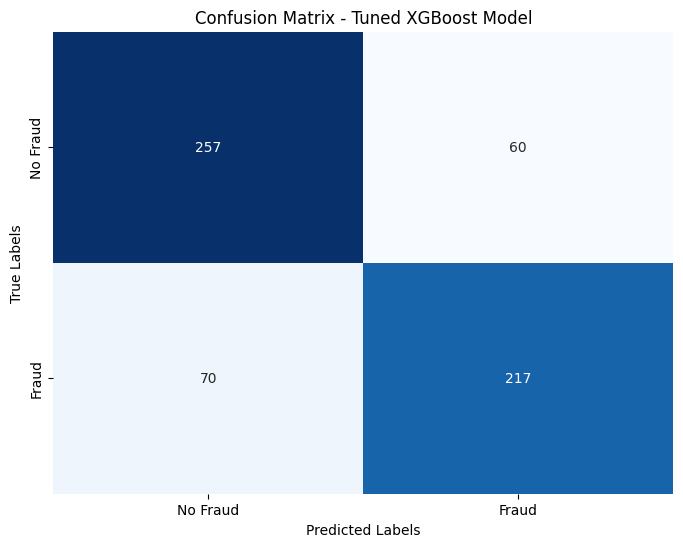

In [ ]:
# Calculate confusion matrix
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Fraud', 'Fraud'], yticklabels=['No Fraud', 'Fraud'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Tuned XGBoost Model')
plt.show()

### Logistic Regression

In [ ]:
# Instantiate Linear Regression
lr_model = LogisticRegression()

# Train the model
lr_model.fit(X_train, y_train)

# Make predictions
y_pred_lr = lr_model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred_lr))
f1 = f1_score(y_test, y_pred_lr, average='weighted')
print("F1 Score:", f1)

              precision    recall  f1-score   support

           0       0.58      0.61      0.59       317
           1       0.54      0.51      0.52       287

    accuracy                           0.56       604
   macro avg       0.56      0.56      0.56       604
weighted avg       0.56      0.56      0.56       604

F1 Score: 0.5601312040923412


### KMeans Clustering

Initializing K-Means clustering...


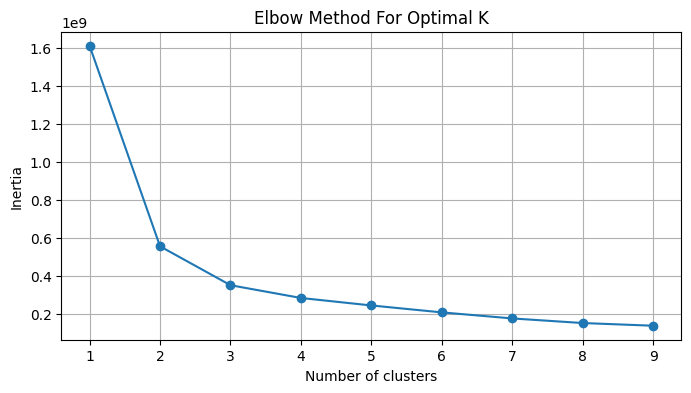

In [ ]:
from sklearn.cluster import KMeans

print("Initializing K-Means clustering...")

# Determine the optimal number of clusters using the elbow method
inertia = []
cluster_range = range(1, 10)
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train)
    inertia.append(kmeans.inertia_)

# Plotting the elbow graph to find the optimal number of clusters
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 4))
plt.plot(cluster_range, inertia, marker='o')
plt.title('Elbow Method For Optimal K')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

#### Choosing the optimal value of k
Looking at the elbow plot, the optimal number of clusters (K) seems to be around 4..

In [ ]:
optimal_k = 4
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_optimal.fit(X_train)

# Assigning cluster labels to the data points
clusters = kmeans_optimal.labels_

print("Clustering complete.")

Clustering complete.


In [ ]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(X_train, clusters)
print(f"The average silhouette score is: {silhouette_avg}")


The average silhouette score is: 0.3570418906108595


In [ ]:
#Drop train target column
train2 = balanced_train.drop(columns=['Target'])

# Predict the cluster labels for the train data
balanced_train_clusters = kmeans_optimal.predict(train2)

# Add the predicted cluster labels as a new column in the original train DataFrame
balanced_train['cluster'] = balanced_train_clusters

print("Cluster labels added as a new column to the train data.")


Cluster labels added as a new column to the train data.


In [ ]:
balanced_train.head()

,ID,TR_1_EventInd,TR_2_EventInd,TR_3_EventInd,feature_10_A,feature_10_B,feature_10_F,feature_10_G,feature_1_A,feature_1_B,...,feature_9_G,feature_X_A,feature_X_B,feature_X_C,feature_X_D,index_1,index_2,index_3,Target,cluster
0,1413,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.000,...,0.0,0,0.006,0.681633,-1.879492,0.0,0.0,0.0,0,3
1,1565,0.0,0.0,0.0,1.0,0.009,0.0,0.0,1.0,0.008,...,11.0,0,0.028,0.688473,0.780115,0.0,0.0,0.0,0,3
2,204,0.0,0.0,0.0,1.0,0.020,0.0,1.0,0.0,0.004,...,0.0,0,0.013,-1.195774,0.123419,0.0,0.0,0.0,0,2
3,1408,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.000,...,0.0,1,0.157,2.457835,3.065024,0.0,0.0,0.0,0,3
4,53,0.0,0.0,0.0,0.0,0.034,0.0,0.0,1.0,0.004,...,1.0,1,0.005,-0.802611,1.523495,0.0,0.0,0.0,1,2


In [ ]:
# Predict the cluster labels for the test data
test_clusters = kmeans_optimal.predict(test)

# Add the predicted cluster labels as a new column in the original test DataFrame
test['cluster'] = test_clusters

print("Cluster labels added as a new column to the test data.")

Cluster labels added as a new column to the test data.


In [ ]:
balanced_train.shape

(3020, 79)

#### Model Stacking

I'll try to combine different models to see if this gives me a higher f1 score.

Confusion Matrix:
[[257  60]
 [ 67 220]]
F1 Score: 0.7896


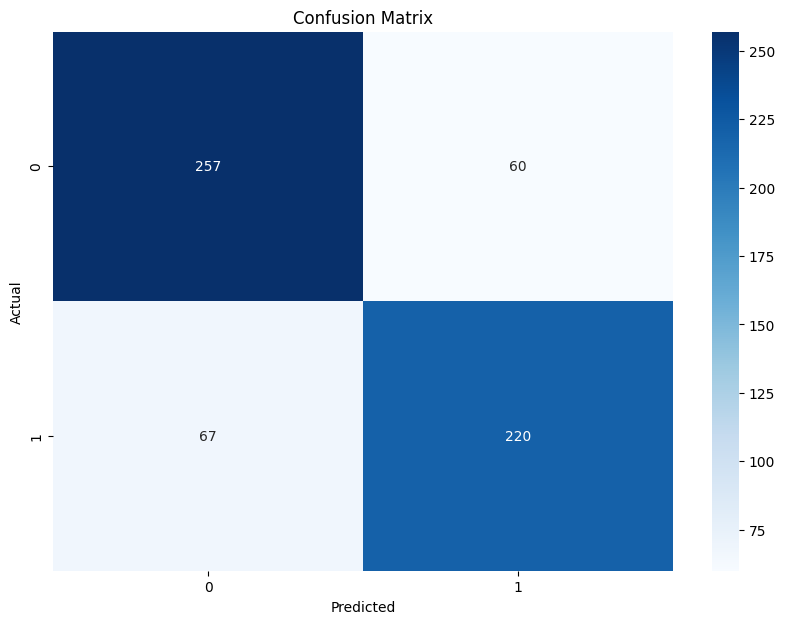

In [ ]:
#  Define the base models
base_models = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=100, random_state=42)),
    ('knn', KNeighborsClassifier(n_neighbors=5))
]

# Define the meta-model
meta_model = LogisticRegression()

# Create the StackingClassifier
stacking_clf = StackingClassifier(estimators=base_models, final_estimator=meta_model)

# Train the stacking model
stacking_clf.fit(X_train, y_train)

# Make predictions
y_pred = stacking_clf.predict(X_test)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Compute the F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'F1 Score: {f1:.4f}')

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Confusion Matrix:
[[261  56]
 [144 143]]
F1 Score: 0.6591
Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.82      0.72       317
           1       0.72      0.50      0.59       287

    accuracy                           0.67       604
   macro avg       0.68      0.66      0.66       604
weighted avg       0.68      0.67      0.66       604



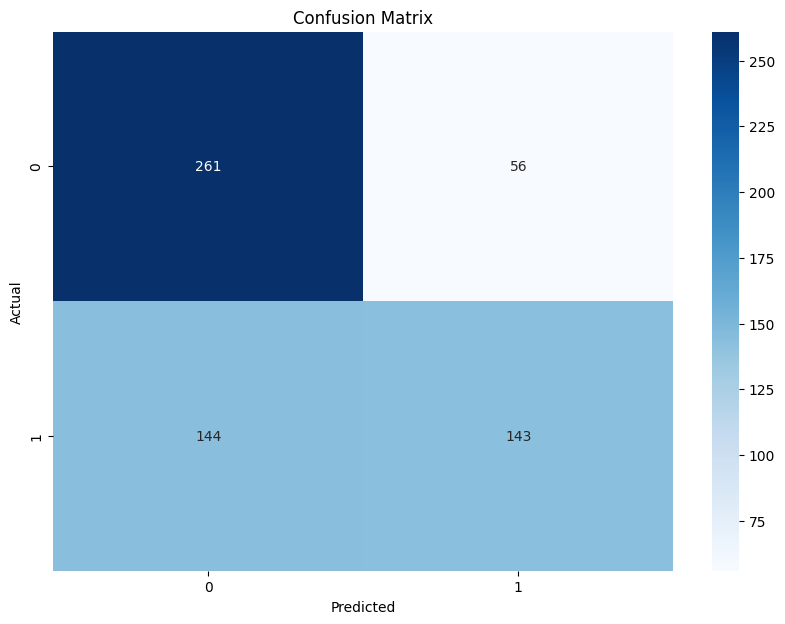

In [ ]:
# Define and train the Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Define and train the MLP model
mlp = MLPClassifier(
    hidden_layer_sizes=(25, 18, 10, 5), activation='relu', solver='adam', alpha=0.0001,
    batch_size='auto', learning_rate='constant', learning_rate_init=0.001,
    power_t=0.5, max_iter=200, shuffle=True, random_state=None, tol=0.0001,
    verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,
    early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999,
    epsilon=1e-08, n_iter_no_change=10, max_fun=15000
)
mlp.fit(X_train, y_train)

# Make predictions with both models on the test data
rf_preds = rf.predict(X_test)
mlp_preds = mlp.predict(X_test)

# Combine the predictions
combined_preds = np.zeros_like(rf_preds)
for i in range(len(y_test)):
    if mlp_preds[i] == 0:
        combined_preds[i] = 0
    else:
        combined_preds[i] = rf_preds[i]

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, combined_preds)
print('Confusion Matrix:')
print(conf_matrix)

# Compute the F1 score
f1 = f1_score(y_test, combined_preds, average='weighted')
print(f'F1 Score: {f1:.4f}')

# Generate a classification report
print('Classification Report:')
print(classification_report(y_test, combined_preds))

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Confusion Matrix:
[[269  48]
 [130 157]]
F1 Score: 0.6976


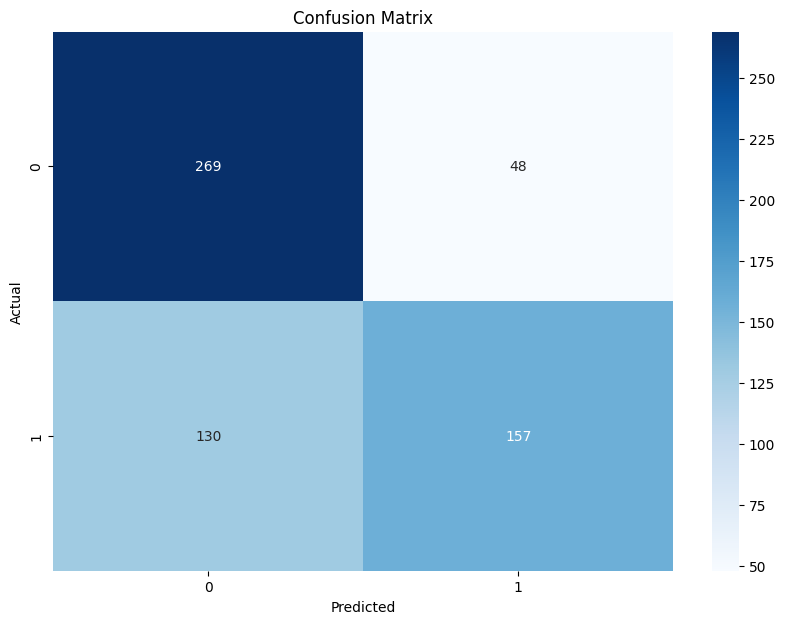

In [ ]:
# Apply log transformation to the features
X_transformed = X.apply(lambda x: np.log1p(x) if np.all(x > 0) else x)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

# Train the Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Train the MLP model
mlp = MLPClassifier(
    hidden_layer_sizes=(25, 18, 10, 5), activation='relu', solver='adam', alpha=0.0001,
    batch_size='auto', learning_rate='constant', learning_rate_init=0.001,
    power_t=0.5, max_iter=200, shuffle=True, random_state=None, tol=0.0001,
    verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,
    early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999,
    epsilon=1e-08, n_iter_no_change=10, max_fun=15000
)
mlp.fit(X_train, y_train)

# Make predictions with both models on the test data
rf_preds = rf.predict(X_test)
mlp_preds = mlp.predict(X_test)

# Combine the predictions
combined_preds = np.zeros_like(rf_preds)
for i in range(len(y_test)):
    if mlp_preds[i] == 0:
        combined_preds[i] = 0
    else:
        combined_preds[i] = rf_preds[i]

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, combined_preds)
print('Confusion Matrix:')
print(conf_matrix)

# Compute the F1 score
f1 = f1_score(y_test, combined_preds, average='weighted')
print(f'F1 Score: {f1:.4f}')

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


The Logistic Regression + RandomForest + K-Nearest Neighbors + Gradient Boosting Classifier stack gave the best local score in the end.

____

In [ ]:
test.head()

,ID,TR_1_EventInd,TR_2_EventInd,TR_3_EventInd,feature_10_A,feature_10_B,feature_10_F,feature_10_G,feature_1_A,feature_1_B,...,feature_9_F,feature_9_G,feature_X_A,feature_X_B,feature_X_C,feature_X_D,index_1,index_2,index_3,cluster
0,2661,0.0,0.0,0.0,1.0,0.023,0.0,1.0,0.0,0.006,...,0.0,0.0,1,0.007,-0.756314,-1.017673,0.0,0.0,0.0,1
1,2662,0.0,0.0,0.0,0.0,0.015,0.0,0.0,1.0,0.004,...,0.0,0.0,1,0.043,1.360077,1.350602,0.0,0.0,0.0,1
2,2663,0.0,0.0,0.0,0.0,0.021,0.0,1.0,1.0,0.006,...,0.0,2.0,0,0.079,-1.537280,0.025794,0.0,0.0,0.0,1
3,2664,0.0,0.0,0.0,0.0,0.031,0.0,0.0,1.0,0.016,...,0.0,0.0,1,0.013,2.282302,1.260612,0.0,0.0,0.0,1
4,2665,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.000,...,0.0,0.0,1,0.090,1.918765,2.524217,0.0,0.0,0.0,1


In [ ]:
solution_format.head()

,ID,Target
0,2661,1
1,2662,1
2,2663,1
3,2664,1
4,2665,1


In [ ]:
# Predict on the test set using the stack model
predictions = stacking_clf.predict(test)

# Create submission file
sub = pd.DataFrame({'ID': test['ID'], 'Target': predictions})

# Create a csv file
sub.to_csv('submission.csv', index = False)

____
